<a href="https://colab.research.google.com/github/restrepo/ComputationalMethods/blob/master/exams/Examen_2018_3_1007790895.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%pylab inline
from scipy.integrate import odeint
from IPython.display import Math

Populating the interactive namespace from numpy and matplotlib


## 1. Coordenadas  x, y del movimiento

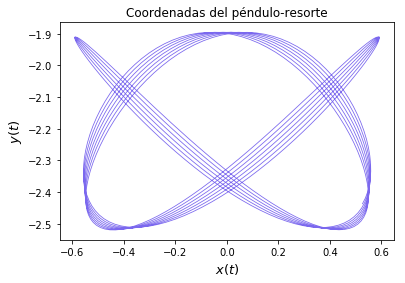

In [0]:
# definición de la función que da las derivadas de los parámetros por hallar
def du_dt(u0,t,L0=1,k=3.5,m=0.5,g=9.8):
    L,θ,v,ω = u0
    dudt = [v, ω, (L0+L)*ω**2 - k/m*L + g*np.cos(θ), -(g*np.sin(θ) + 2*v*ω)/(L0 + L)]
    return dudt

# definición de constantes
n = 1000   
L0 = 1            # longitud en reposo [m]
k = 4           # constante elástica [N/m]
m = 0.5           # masa [kg]
g = 9.8           # gravedad [m/s²]
u0 = [1,0.3,0,0]  # condiciones iniciales de L,θ,v,ω

t = np.linspace(0,30,n)
#t = np.linspace(0,40,n)

# solución de las ecuaciones diferenciales: L,θ,v,ω
u = odeint(du_dt,u0,t,args=(L0,k,m,g))

# coordenadas x, y del movimiento
x = (L0+u[:,0])*np.sin(u[:,1])
y = -(L0+u[:,0])*np.cos(u[:,1])

# gráfico de las coordenadas
plt.plot(x,y,c='mediumslateblue',lw=0.8)
plt.title('Coordenadas del péndulo-resorte')
plt.xlabel('$x(t)$',size=13)
plt.ylabel('$y(t)$',size=13)
#plt.grid()
plt.show()

## 2. Espacio de configuraciones

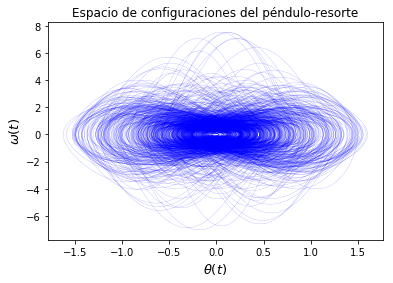

In [0]:
# definición de condiciones iniciales aleatorias
n = 100
Lp = np.random.uniform(0,1,n)
θp = np.random.uniform(-np.pi/2,np.pi/2,n)
vp = np.random.uniform(-1,1,n)
ωp = np.random.uniform(-1,1,n)

t = np.linspace(0,30,10000)

# cálculo de L,θ,v,ω en las distintas condiciones iniciales
for L,θ,v,ω in zip(Lp,θp,vp,ωp):
    u0 = [L,θ,v,ω]
    u = odeint(du_dt,u0,t,args=(L0,k,m,g))
    plt.plot(u[:,1],u[:,3],c='b',lw=0.1)
plt.title('Espacio de configuraciones del péndulo-resorte')
plt.xlabel('$θ(t)$',size=13)
plt.ylabel('$ω(t)$',size=13)
#plt.xlim(-0.5,0.5)
#plt.ylim(-0.5,0.5)
#plt.grid()
plt.show()